In [1]:
import pandas as pd
import os

In [2]:
scoring = pd.read_pickle(os.path.join("data", "scoring.pickle"))
team_splits = pd.read_pickle(os.path.join("data.", "team_splits.pickle"))

In [3]:
scoring.head()

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [4]:
three_years = scoring.loc[(scoring.year > 2000) &
                          (scoring.year < 2004)]

# One record per player/year
three_years = three_years.drop_duplicates(subset=["playerID", "year"])

# Get three random players with complete history between 2001-2003
counts = three_years["playerID"].value_counts()
ids = counts[counts == 3].sample(3).index

# Get actual records corresponding for those players
df3 = three_years.loc[three_years['playerID'].isin(ids)]
basic_df3 = df3[["playerID", "year", "G"]]

In [5]:
basic_df3

,playerID,year,G
5176,dackean01,2001,15.0
5177,dackean01,2002,7.0
5178,dackean01,2003,4.0
7228,ferenbr01,2001,2.0
7229,ferenbr01,2002,2.0
7231,ferenbr01,2003,0.0
25912,timonki01,2001,13.0
25913,timonki01,2002,6.0
25914,timonki01,2003,12.0


In [6]:
pivot = basic_df3.pivot(index="playerID", columns="year", values="G")
pivot

year,2001,2002,2003
playerID,,,
dackean01,15.0,7.0,4.0
ferenbr01,2.0,2.0,0.0
timonki01,13.0,6.0,12.0


In [7]:
pivot.index

Index(['dackean01', 'ferenbr01', 'timonki01'], dtype='object', name='playerID')

In [8]:
pivot.columns

Int64Index([2001, 2002, 2003], dtype='int64', name='year')

In [9]:
pivot.index.name = None
pivot.columns.name = None

In [10]:
pivot

,2001,2002,2003
dackean01,15.0,7.0,4.0
ferenbr01,2.0,2.0,0.0
timonki01,13.0,6.0,12.0


In [11]:
pivot.index.name = "playerID"
pivot.columns.name = "year"

In [12]:
basic_df3.set_index("playerID")

,year,G
playerID,,
dackean01,2001,15.0
dackean01,2002,7.0
dackean01,2003,4.0
ferenbr01,2001,2.0
ferenbr01,2002,2.0
ferenbr01,2003,0.0
timonki01,2001,13.0
timonki01,2002,6.0
timonki01,2003,12.0


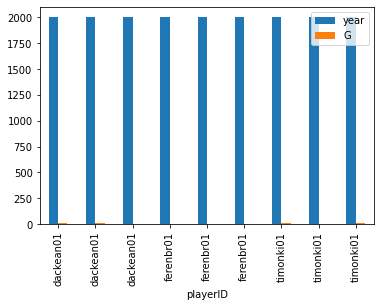

In [13]:
basic_df3.set_index("playerID").plot.bar();

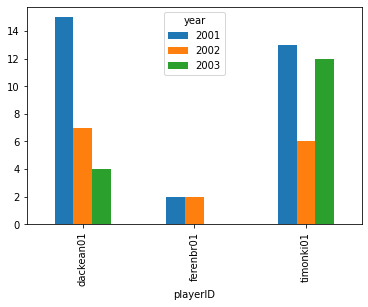

In [14]:
pivot.plot.bar();

In [15]:
pivot

year,2001,2002,2003
playerID,,,
dackean01,15.0,7.0,4.0
ferenbr01,2.0,2.0,0.0
timonki01,13.0,6.0,12.0


In [16]:
pivot = pivot.reset_index()
pivot.columns.name = None
pivot

,playerID,2001,2002,2003
0,dackean01,15.0,7.0,4.0
1,ferenbr01,2.0,2.0,0.0
2,timonki01,13.0,6.0,12.0


In [17]:
pivot.melt()

,variable,value
0,playerID,dackean01
1,playerID,ferenbr01
2,playerID,timonki01
3,2001,15.0
4,2001,2.0
5,2001,13.0
6,2002,7.0
7,2002,2.0
8,2002,6.0
9,2003,4.0


In [18]:

pivot.melt(id_vars="playerID")

,playerID,variable,value
0,dackean01,2001,15.0
1,ferenbr01,2001,2.0
2,timonki01,2001,13.0
3,dackean01,2002,7.0
4,ferenbr01,2002,2.0
5,timonki01,2002,6.0
6,dackean01,2003,4.0
7,ferenbr01,2003,0.0
8,timonki01,2003,12.0


In [19]:

pivot.melt(id_vars="playerID", var_name="year", value_name="goals")

,playerID,year,goals
0,dackean01,2001,15.0
1,ferenbr01,2001,2.0
2,timonki01,2001,13.0
3,dackean01,2002,7.0
4,ferenbr01,2002,2.0
5,timonki01,2002,6.0
6,dackean01,2003,4.0
7,ferenbr01,2003,0.0
8,timonki01,2003,12.0


In [20]:
pivot.melt(id_vars="playerID", value_vars=[2001, 2002],
           var_name="year", value_name="goals")

,playerID,year,goals
0,dackean01,2001,15.0
1,ferenbr01,2001,2.0
2,timonki01,2001,13.0
3,dackean01,2002,7.0
4,ferenbr01,2002,2.0
5,timonki01,2002,6.0


In [21]:
larger_df3 = df3[["playerID", "tmID", "year", "G"]]
larger_df3

,playerID,tmID,year,G
5176,dackean01,MTL,2001,15.0
5177,dackean01,MTL,2002,7.0
5178,dackean01,MTL,2003,4.0
7228,ferenbr01,FLO,2001,2.0
7229,ferenbr01,FLO,2002,2.0
7231,ferenbr01,PHO,2003,0.0
25912,timonki01,NAS,2001,13.0
25913,timonki01,NAS,2002,6.0
25914,timonki01,NAS,2003,12.0


In [22]:
try:
    larger_df3.pivot(index=["playerID", "tmID"],
                     columns="year", values="G")
except Exception as e:
    print(e)
        

In [23]:
larger_df3 = df3[["playerID", "year", "G", "A"]]
larger_df3

,playerID,year,G,A
5176,dackean01,2001,15.0,18.0
5177,dackean01,2002,7.0,18.0
5178,dackean01,2003,4.0,8.0
7228,ferenbr01,2001,2.0,15.0
7229,ferenbr01,2002,2.0,6.0
7231,ferenbr01,2003,0.0,5.0
25912,timonki01,2001,13.0,29.0
25913,timonki01,2002,6.0,34.0
25914,timonki01,2003,12.0,32.0


In [24]:
test = larger_df3.pivot(index="playerID", columns="year",
                        values=["G", "A"])
test

G                A            
year       2001 2002  2003  2001  2002  2003
playerID                                    
dackean01  15.0  7.0   4.0  18.0  18.0   8.0
ferenbr01   2.0  2.0   0.0  15.0   6.0   5.0
timonki01  13.0  6.0  12.0  29.0  34.0  32.0

In [25]:
test.columns

MultiIndex([('G', 2001),
            ('G', 2002),
            ('G', 2003),
            ('A', 2001),
            ('A', 2002),
            ('A', 2003)],
           names=[None, 'year'])